In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("smartpark_india_synthetic_dataset.csv")

print("Dataset Shape:", df.shape)

Dataset Shape: (1800, 13)


In [2]:
print("Dataset head: \n", df.head())

Dataset head: 
   Booking_ID        User_Type      Location_Zone         Slot_Type Start_Time  \
0      B1000          Regular  Airport_Proximity  Commercial_Space      12:15   
1      B1001          Regular        Residential          Driveway      17:15   
2      B1002          Regular         Commercial     Apartment_Lot      20:15   
3      B1003  Office_Commuter  Airport_Proximity  Commercial_Space      14:15   
4      B1004          Regular             IT_Hub          Driveway      13:45   

   Duration_Hours  Base_Price_Per_Hour  Dynamic_Price_Per_Hour  \
0               2                85.79                   85.79   
1               3                47.67                   47.67   
2               2                95.59                   95.59   
3               1                73.94                   96.12   
4               2                67.78                   67.78   

  Occupancy_Status Payment_Mode  User_Rating   Event_Tag Anomaly  
0        Available       Wallet  

In [3]:
print("Dataset Info:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Booking_ID              1800 non-null   object 
 1   User_Type               1800 non-null   object 
 2   Location_Zone           1800 non-null   object 
 3   Slot_Type               1800 non-null   object 
 4   Start_Time              1800 non-null   object 
 5   Duration_Hours          1800 non-null   int64  
 6   Base_Price_Per_Hour     1800 non-null   float64
 7   Dynamic_Price_Per_Hour  1800 non-null   float64
 8   Occupancy_Status        1800 non-null   object 
 9   Payment_Mode            1800 non-null   object 
 10  User_Rating             1402 non-null   float64
 11  Event_Tag               1800 non-null   object 
 12  Anomaly                 1800 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 182.9+ KB
Dataset Info:
 None


In [4]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Booking_ID                  0
User_Type                   0
Location_Zone               0
Slot_Type                   0
Start_Time                  0
Duration_Hours              0
Base_Price_Per_Hour         0
Dynamic_Price_Per_Hour      0
Occupancy_Status            0
Payment_Mode                0
User_Rating               398
Event_Tag                   0
Anomaly                     0
dtype: int64


In [5]:
print("Summary Statistics:\n", df.describe())

Summary Statistics:
        Duration_Hours  Base_Price_Per_Hour  Dynamic_Price_Per_Hour  \
count     1800.000000          1800.000000             1800.000000   
mean         3.715000            53.447828               61.615589   
std          2.553355            20.073427               25.560632   
min          1.000000            20.000000               20.000000   
25%          2.000000            37.780000               42.335000   
50%          3.000000            48.875000               56.780000   
75%          4.000000            68.310000               76.722500   
max         10.000000           134.460000              169.980000   

       User_Rating  
count  1402.000000  
mean      3.982953  
std       0.578686  
min       3.000000  
25%       3.500000  
50%       4.000000  
75%       4.500000  
max       5.000000  


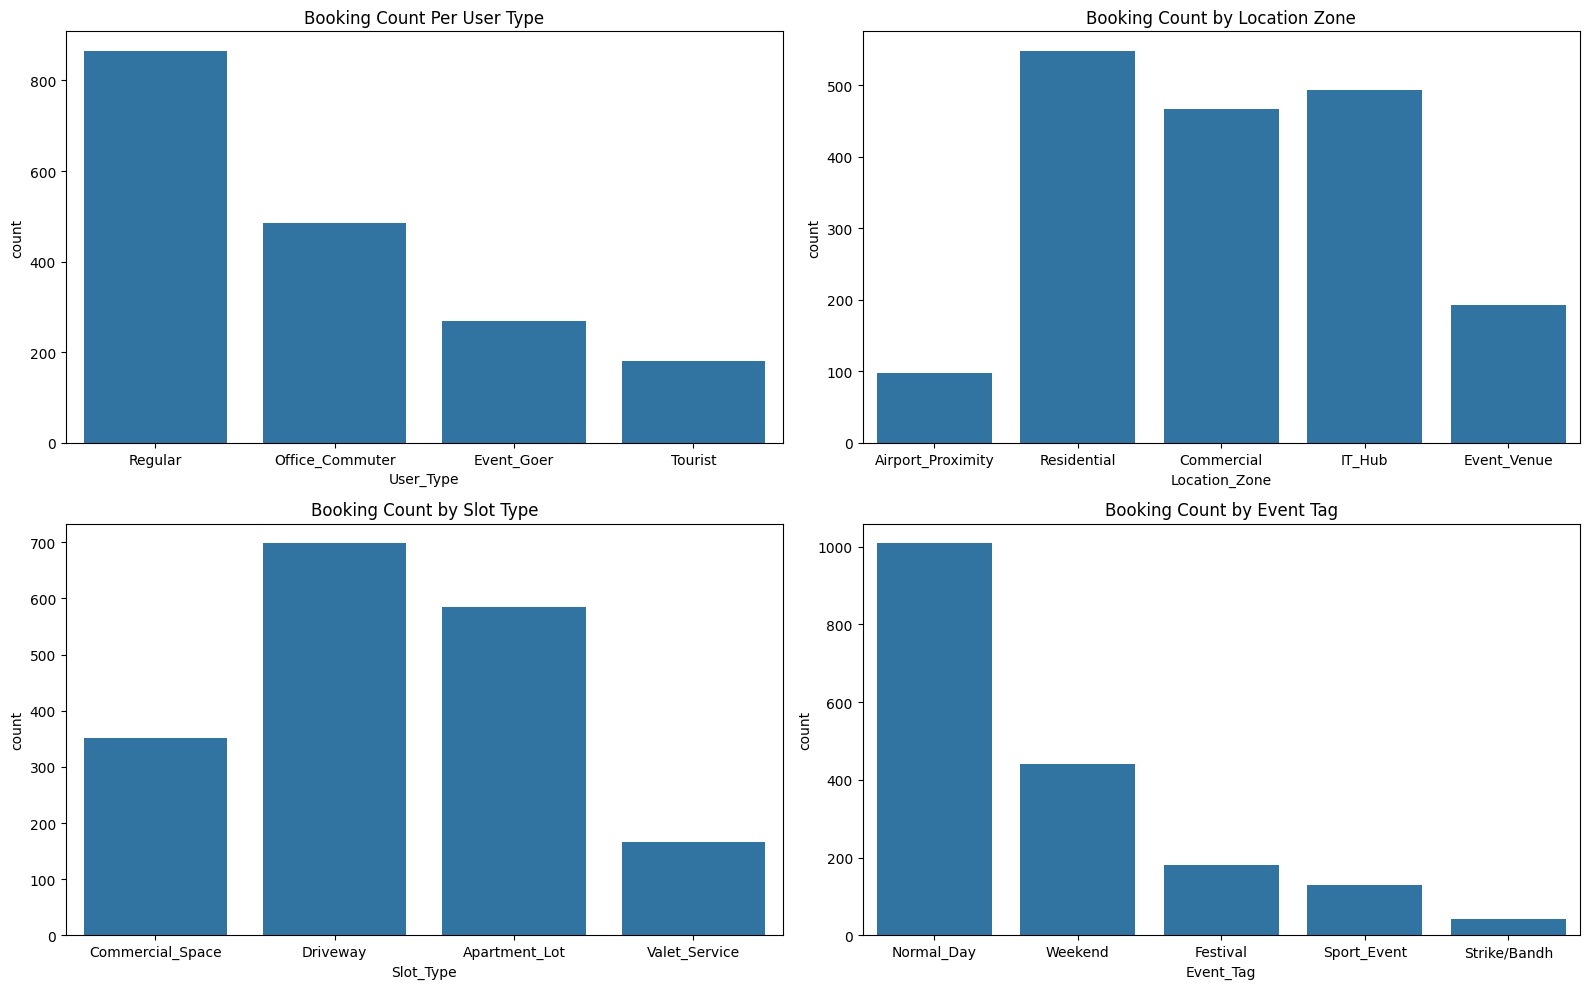

In [6]:
# Countplots - Categorical Features
plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
sns.countplot(x='User_Type', data = df)
plt.title("Booking Count Per User Type")

plt.subplot(2, 2, 2)
sns.countplot(x='Location_Zone', data=df)
plt.title('Booking Count by Location Zone')

plt.subplot(2, 2, 3)
sns.countplot(x='Slot_Type', data=df)
plt.title('Booking Count by Slot Type')


plt.subplot(2, 2, 4)
sns.countplot(x='Event_Tag', data=df)
plt.title('Booking Count by Event Tag')

plt.tight_layout()
plt.show()

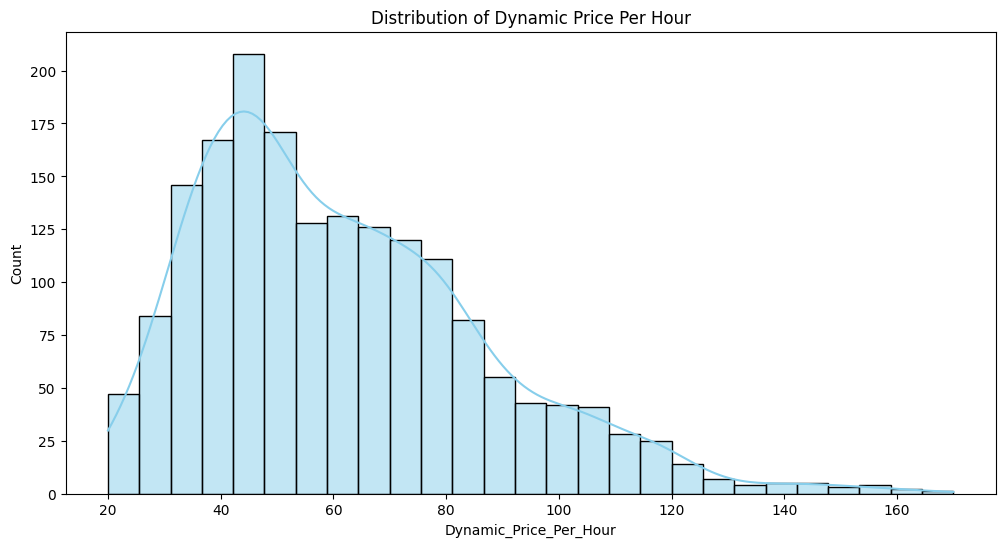

In [7]:
# Distribution of prices

plt.figure(figsize=(12, 6))
sns.histplot(df['Dynamic_Price_Per_Hour'], kde=True, color='skyblue')
plt.title('Distribution of Dynamic Price Per Hour')
plt.show()

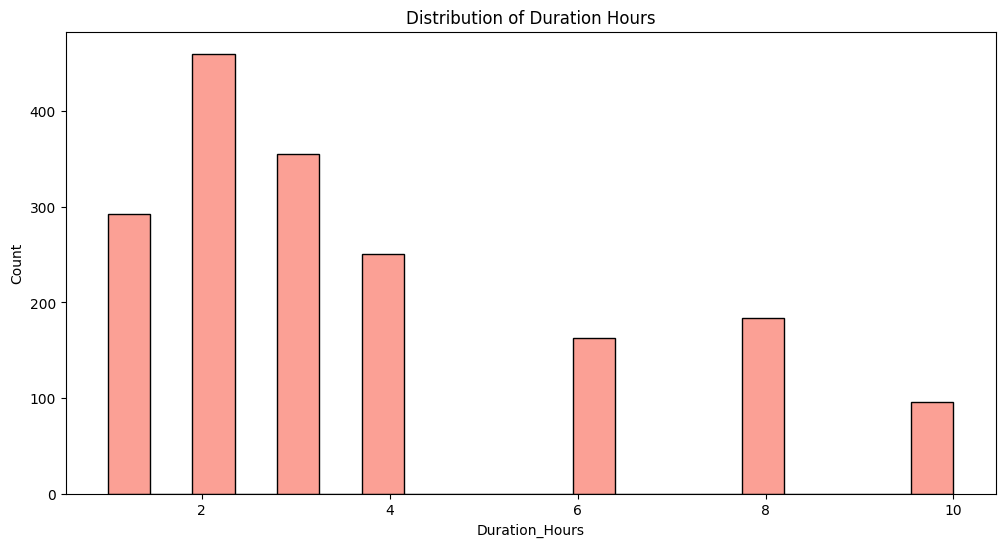

In [8]:
# Distribution of Duration
plt.figure(figsize=(12, 6))
sns.histplot(df['Duration_Hours'], kde=False, color='salmon', bins=20)
plt.title('Distribution of Duration Hours')
plt.show()

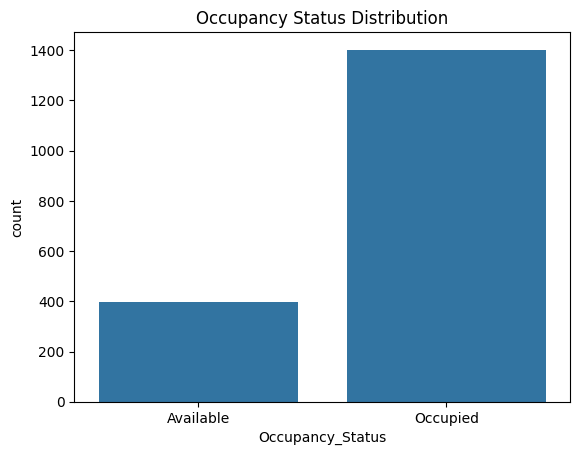

In [9]:
# Occupancy Status Distribution
sns.countplot(x='Occupancy_Status', data=df)
plt.title('Occupancy Status Distribution')
plt.show()


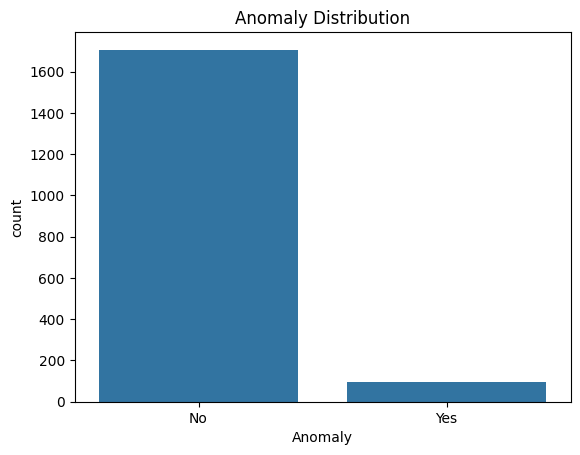

In [10]:
# Anomaly Count
sns.countplot(x='Anomaly', data=df)
plt.title('Anomaly Distribution')
plt.show()


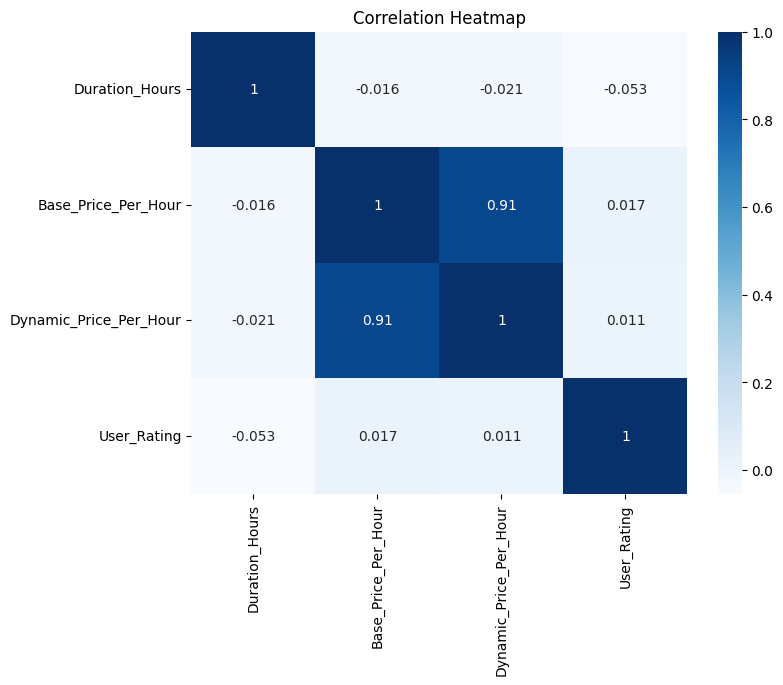

In [11]:
# Correlation Heatmap - Numerical Data
numerical_cols = ['Duration_Hours', 'Base_Price_Per_Hour', 'Dynamic_Price_Per_Hour', 'User_Rating']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# dropping Booking ID 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [22]:
df.drop("Booking_ID", axis = 1, inplace= True)

In [14]:
# Filling missing User_Rating with Median

df['User_Rating'].fillna(df['User_Rating'].median(), inplace= True)

C:\Users\srekilli\AppData\Local\Temp\ipykernel_24148\3976746728.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['User_Rating'].fillna(df['User_Rating'].median(), inplace= True)


In [30]:
categorical_cols = ['User_Type', 'Location_Zone', 'Slot_Type', 'Start_Time', 'Payment_Mode', 'Event_Tag', 'Anomaly']

label_encoders = {}

In [31]:

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [33]:
le_occ = LabelEncoder()
df['Occupancy_Status'] = le_occ.fit_transform(df['Occupancy_Status'])

In [34]:
print(df.dtypes)

User_Type                   int64
Location_Zone               int64
Slot_Type                   int64
Start_Time                  int64
Duration_Hours              int64
Base_Price_Per_Hour       float64
Dynamic_Price_Per_Hour    float64
Occupancy_Status            int64
Payment_Mode                int64
User_Rating               float64
Event_Tag                   int64
Anomaly                     int64
dtype: object


In [35]:
y = df['Occupancy_Status']
X = df.drop(['Occupancy_Status'], axis=1)
print(X.dtypes)  # Should all be numbers

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

User_Type                   int64
Location_Zone               int64
Slot_Type                   int64
Start_Time                  int64
Duration_Hours              int64
Base_Price_Per_Hour       float64
Dynamic_Price_Per_Hour    float64
Payment_Mode                int64
User_Rating               float64
Event_Tag                   int64
Anomaly                     int64
dtype: object


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
print("\n--- Demand Prediction Model ---\n")
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))


--- Demand Prediction Model ---

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       264

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



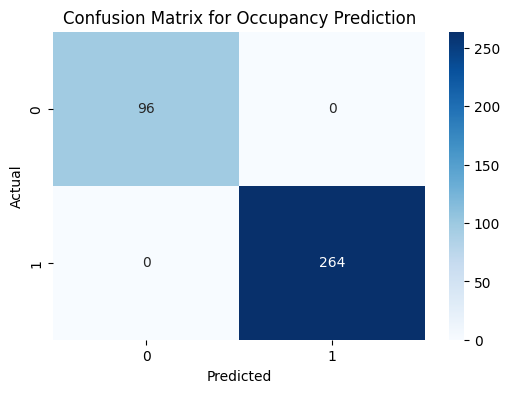

In [37]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Occupancy Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [38]:
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

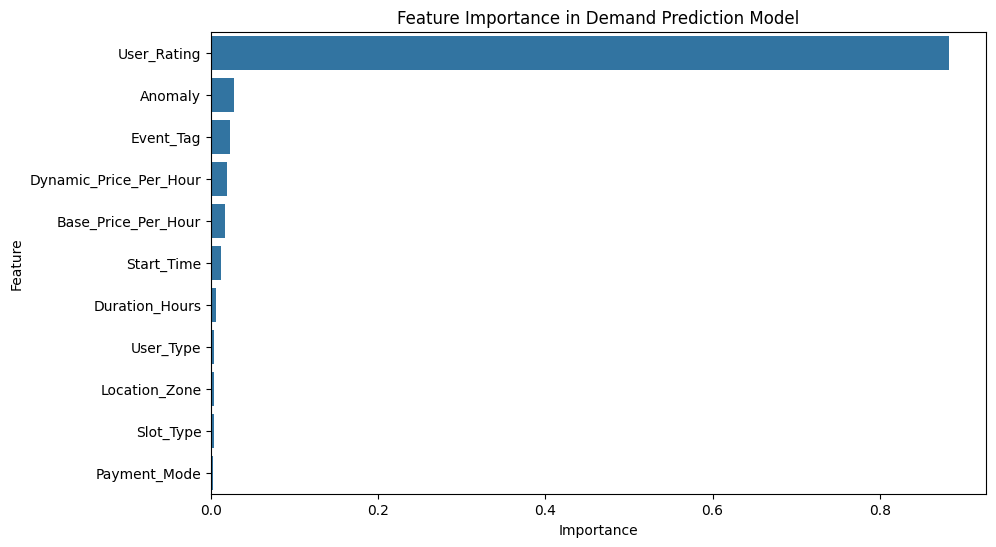

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Demand Prediction Model')
plt.show()


In [40]:
#feature scaling (numerical)

numerical_cols = ['Duration_Hours', 'Base_Price_Per_Hour', 'Dynamic_Price_Per_Hour', 'User_Rating']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nPreprocessed Data Sample:\n")
print(df.head())


Preprocessed Data Sample:

   User_Type  Location_Zone  Slot_Type  Start_Time  Duration_Hours  \
0          2              0          1          25       -0.671852   
1          2              4          2          45       -0.280102   
2          2              1          0          57       -0.671852   
3          1              0          1          33       -1.063603   
4          2              3          2          31       -0.671852   

   Base_Price_Per_Hour  Dynamic_Price_Per_Hour  Occupancy_Status  \
0             1.611641                0.946030                 0   
1            -0.287915               -0.545740                 1   
2             2.099984                1.329539                 1   
3             1.021144                1.350280                 1   
4             0.714186                0.241235                 0   

   Payment_Mode  User_Rating  Event_Tag  Anomaly  
0             2          NaN          1        0  
1             2    -1.180601          1 

In [41]:
# Dynamic pricing model - predict dynamic_price_per_hour

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

y_price = df['Dynamic_Price_Per_Hour']
X_price = df.drop(['Dynamic_Price_Per_Hour'], axis=1)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_price, y_price, test_size=0.2, random_state=42)

print("\n--- Dynamic Pricing Model (Random Forest Regressor) ---\n")
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_p, y_train_p)
y_pred_p = reg.predict(X_test_p)

mse = mean_squared_error(y_test_p, y_pred_p)
r2 = r2_score(y_test_p, y_pred_p)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")



--- Dynamic Pricing Model (Random Forest Regressor) ---

Mean Squared Error: 0.0169
R2 Score: 0.9841


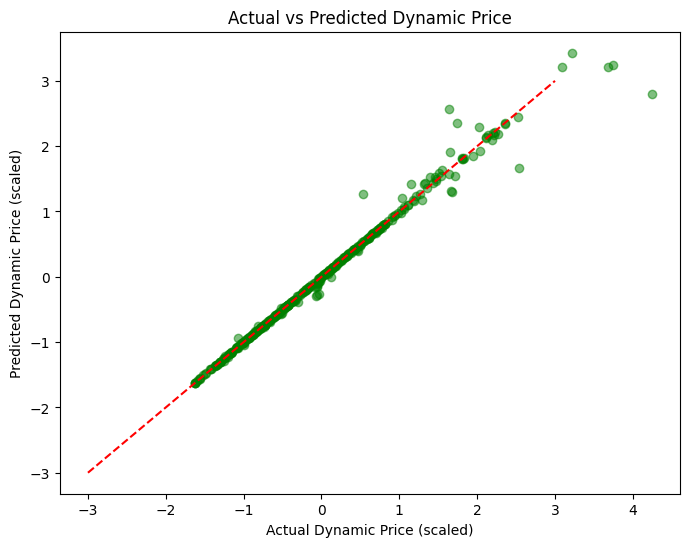

In [42]:
# scatter plot : actual vs predicted

plt.figure(figsize=(8,6))
plt.scatter(y_test_p, y_pred_p, alpha=0.5, color='green')
plt.plot([-3, 3], [-3, 3], color='red', linestyle='--')
plt.title('Actual vs Predicted Dynamic Price')
plt.xlabel('Actual Dynamic Price (scaled)')
plt.ylabel('Predicted Dynamic Price (scaled)')
plt.show()

In [43]:
#feature importance

importances_p = reg.feature_importances_
feature_names_p = X_price.columns
importance_df_p = pd.DataFrame({'Feature': feature_names_p, 'Importance': importances_p}).sort_values(by='Importance', ascending=False)


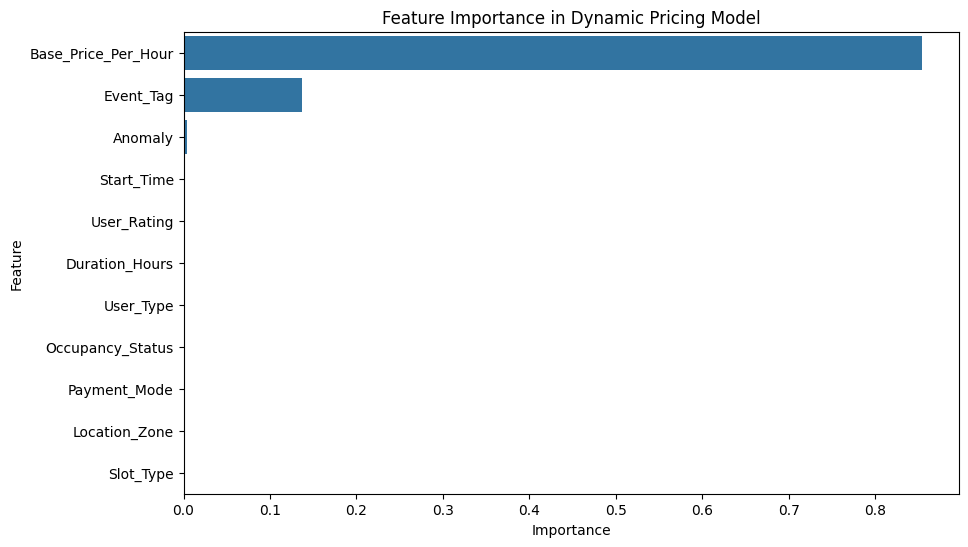

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df_p)
plt.title('Feature Importance in Dynamic Pricing Model')
plt.show()


In [48]:
from sklearn.ensemble import IsolationForest

# Anamoly Detection 

print("\n--- Anomaly Detection (Isolation Forest) ---\n")
# Drop both Anomaly (target) and any non-numeric columns like 'Anomaly_Predicted'
X_anomaly = df.drop(['Anomaly', 'Anomaly_Predicted'], axis=1, errors='ignore')

# Double-check everything is numeric
y_anomaly = df['Anomaly']

iso = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso.fit(X_anomaly)
df['Anomaly_Predicted'] = iso.predict(X_anomaly)
df['Anomaly_Predicted'] = df['Anomaly_Predicted'].map({1: 'No', -1: 'Yes'})
print("\nPredicted Anomalies:\n", df['Anomaly_Predicted'].value_counts())


--- Anomaly Detection (Isolation Forest) ---


Predicted Anomalies:
 Anomaly_Predicted
No     1620
Yes     180
Name: count, dtype: int64


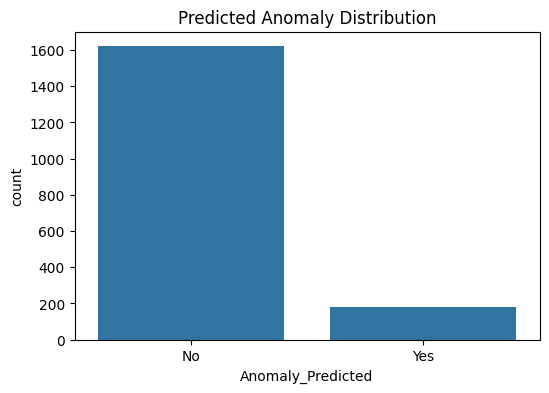

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(x='Anomaly_Predicted', data=df)
plt.title('Predicted Anomaly Distribution')
plt.show()

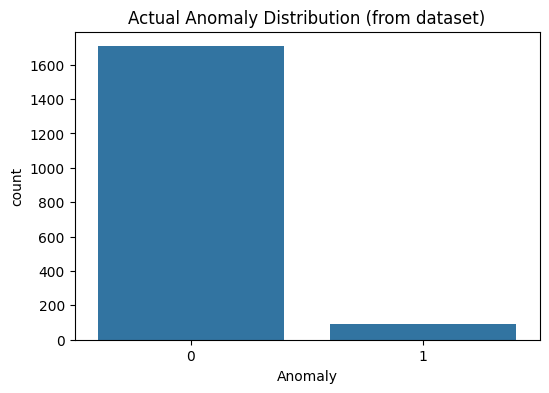

In [50]:
plt.figure(figsize=(6,4))
sns.countplot(x='Anomaly', data=df)
plt.title('Actual Anomaly Distribution (from dataset)')
plt.show()


In [57]:
# Extract hour from Start_Time if it's string
if df['Start_Time'].dtype == 'object':
    df['Start_Hour'] = df['Start_Time'].str.split(':').str[0].astype(int)
    df.drop('Start_Time', axis=1, inplace=True)


In [58]:
# Step 5: K-Means Clustering Clean Fix

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Clustering with Clean Data ---\n")

# ✅ Drop label columns and only keep usable features
features_to_exclude = ['Anomaly', 'Occupancy_Status']
X_cluster = df.drop(features_to_exclude, axis=1)

# ✅ Double-check datatypes before clustering
print("\nData Types Check Before Clustering:\n", X_cluster.dtypes)

# ✅ Ensure all columns are numeric
# You already encoded 'User_Type', 'Location_Zone', etc. — so no strings should remain
assert all(pd.api.types.is_numeric_dtype(X_cluster[col]) for col in X_cluster.columns), "Non-numeric columns exist!"

# ✅ Drop any rows with NaN (if any left)
X_cluster_clean = X_cluster.dropna().reset_index(drop=True)

# ✅ Elbow Method
inertia = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_clean)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# ✅ Final KMeans Clustering
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_final.fit(X_cluster_clean)

# ✅ Assign Cluster Labels
df_cluster = X_cluster_clean.copy()
df_cluster['Cluster_Label'] = kmeans_final.labels_

print("\nCluster Distribution:\n", df_cluster['Cluster_Label'].value_counts())

sns.countplot(x='Cluster_Label', data=df_cluster)
plt.title('Cluster Distribution')
plt.show()



--- Clustering with Clean Data ---


Data Types Check Before Clustering:
 User_Type                   int64
Location_Zone               int64
Slot_Type                   int64
Start_Time                  int64
Duration_Hours            float64
Base_Price_Per_Hour       float64
Dynamic_Price_Per_Hour    float64
Payment_Mode                int64
User_Rating               float64
Event_Tag                   int64
Anomaly_Predicted          object
dtype: object


AssertionError: Non-numeric columns exist!